In [1]:
import skimage
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io, color
import os 
import cv2
import PIL, PIL.Image
import tensorflow as tf
from tensorflow import keras
import pathlib
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation
from keras import backend as K
import numpy as np
import matplotlib.image as mpimg
import os
import random
from icrawler.builtin import GoogleImageCrawler
from keras.layers import Input, Concatenate, Dense
from PIL import Image


In [2]:
path = 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data'

In [3]:
import os
from PIL import Image

def convert_images_to_jpg(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)

    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)
        output_path = os.path.join(output_folder, os.path.splitext(filename)[0] + ".jpg")
        try:
            with Image.open(input_path) as img:
                pass
        except:
            print(f"Skipping non-image file: {input_path}")
            continue
        with Image.open(input_path) as img:
            img.convert('RGB').save(output_path, 'JPEG')

In [4]:
# input_folder = 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\data'
# output_folder = 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData'

# # Loop over subfolders within the input folder
# for subfolder in os.listdir(input_folder):
#     subfolder_path = os.path.join(input_folder, subfolder)

#     # Check if subfolder is a directory
#     if os.path.isdir(subfolder_path):
#         print(f"Converting images in subfolder: {subfolder}")
#         subfolder_output = os.path.join(output_folder, subfolder)
#         convert_images_to_jpg(subfolder_path, subfolder_output)

In [5]:
Flowers = tf.keras.preprocessing.image_dataset_from_directory('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData')

Found 16362 files belonging to 8 classes.


In [6]:
#showing information
class_names = Flowers.class_names
print(class_names)

['Baby', 'Calimerio', 'Chrysanthemum', 'Hydrangeas', 'Lisianthus', 'Pingpong', 'Rosy', 'Tana']


In [7]:
for i in class_names:
    print(i, len(os.listdir('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData\\'+i)))

Baby 2062
Calimerio 2025
Chrysanthemum 2064
Hydrangeas 2048
Lisianthus 2090
Pingpong 2022
Rosy 2002
Tana 2049


In [8]:
#resize image
for i in class_names:
    for j in os.listdir('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData\\'+i):
        img = Image.open('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData\\'+i+'\\'+j)
        img = img.resize((180,180))
        img.save('C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData\\'+i+'\\'+j)


In [9]:
#convert to numpy array
iterator = Flowers.as_numpy_iterator()
batch = next(iterator)
print(batch[0].shape)
print(batch[1].shape)

(32, 256, 256, 3)
(32,)


C:\Users\Admin\AppData\Local\Temp\ipykernel_13288\4164230420.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


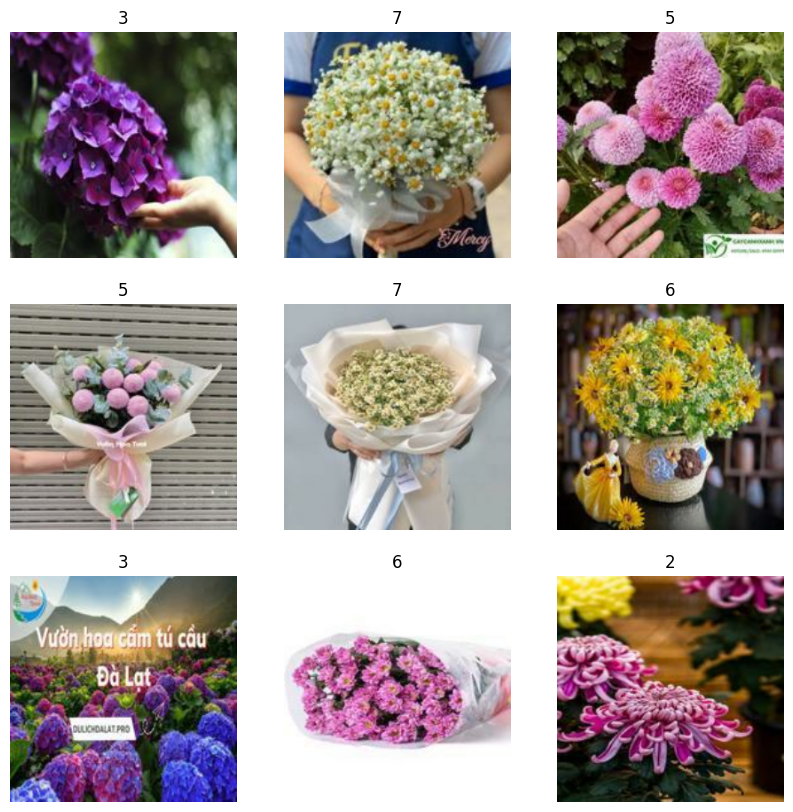

In [10]:
fix, ax = plt.subplots(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(batch[0][i].astype('uint8'))
    plt.title(batch[1][i])
    plt.axis('off')
plt.show()


In [18]:
path = 'C:\TaiLieuHocTap\RMIT\A_2023\ML_A23\GroupTest\PjgData'

def remove_identical_images(folder_path):
    image_hashes = {}

    for name in os.listdir(path):
        image_path = os.path.join(path, name)
        img = PIL.Image.open(image_path)
        hash = image_hashes.average_hash(img)

        # Check if we've already seen this hash
        identical_image = image_hashes.get(hash)

        if identical_image:
            # Delete image
            os.remove(image_path)
        else:
            # Store hash
            image_hashes[hash] = name


In [16]:
#normalize images
def normalize_images(path):
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                img = cv2.resize(img, (256, 256))
                img = img.astype(np.float32) / 255.0
                img = (img - 0.5) * 2.0  # Rescale to [-1, 1]
                cv2.imwrite(img_path, img)

normalize_images(path)


In [19]:
#remove outliers:
def remove_outliers(path, thresold = 3):
    for Dname in os.listdir(path):
        subPath = os.path.join(path, Dname)
        for file in os.listdir(subPath):
            img_path = os.path.join(subPath, file)
            img = cv2.imread(img_path)
            if img is not None:
                if img.shape[0] > thresold * img.shape[1] or img.shape[1] > thresold * img.shape[0]:
                    os.remove(img_path)
remove_outliers(path)

In [21]:
len(Flowers)

512

In [22]:
#split into train and validation , test set
train_size = int (0.6 * len(Flowers))
val_size = int (0.2 * len(Flowers))
test_size = int (0.2 * len(Flowers))

train = Flowers.take(train_size)
val = Flowers.skip(train_size).take(val_size)
test = Flowers.skip(train_size + val_size).take(test_size)
print(len(train), len(test), len(val))



307 102 102


In [30]:
#data augmentation
